In [33]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Spotify_data.csv")

In [3]:
df.head(3)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113


In [4]:
df.shape

(227, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [6]:
df.isnull().sum()

Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
numeric = df.select_dtypes(exclude = "object")

In [9]:
numeric.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [10]:
corr = numeric.corr()

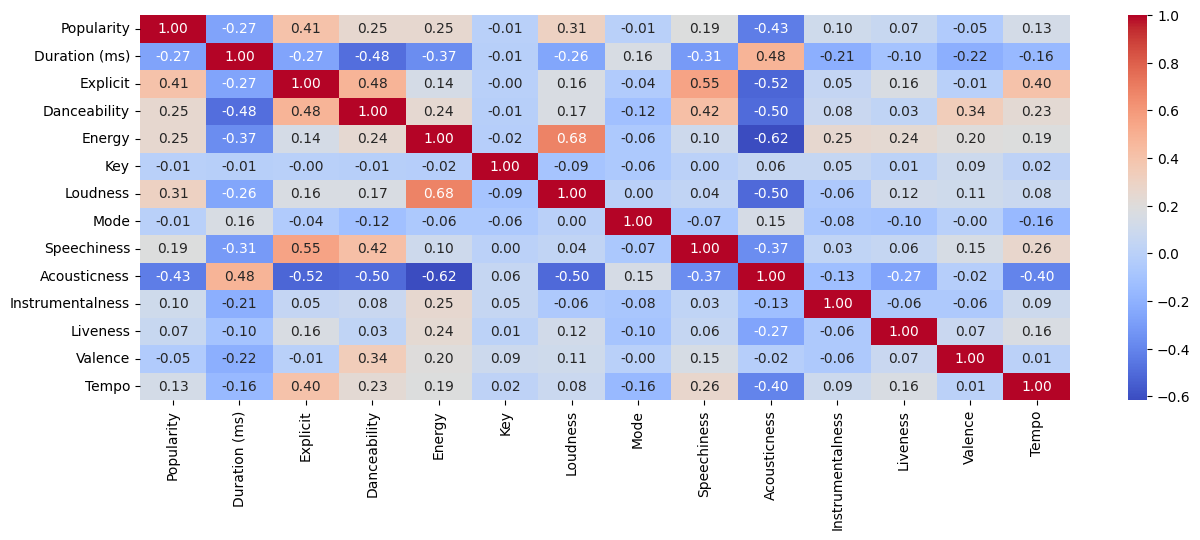

In [11]:
plt.figure( figsize= (15,5))
sns.heatmap(corr, annot = True , fmt = "1.2f", cmap = "coolwarm")
plt.show()

In [25]:
data = numeric[["Explicit", "Liveness", "Valence", "Acousticness", "Speechiness", "Loudness", "Duration (ms)"]]

In [26]:
data['Explicit'] = data['Explicit'].map({True:1, False:0})

In [27]:
data.head(3)

,Explicit,Liveness,Valence,Acousticness,Speechiness,Loudness,Duration (ms)
0,1,0.1410,0.214,0.0107,0.0776,-7.001,274192
1,1,0.0582,0.889,0.0292,0.0683,-2.760,227239
2,1,0.1190,0.886,0.3590,0.2040,-5.241,140733


In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings as w
w.filterwarnings("ignore")

In [28]:
mm = MinMaxScaler()

In [29]:
df = mm.fit_transform(data)

In [31]:
df

array([[1.        , 0.14638958, 0.18800214, ..., 0.11363636, 0.55102737,
        0.61824188],
       [1.        , 0.0374852 , 0.91108731, ..., 0.0936964 , 0.84053519,
        0.45446681],
       [1.        , 0.11745364, 0.90787359, ..., 0.38464837, 0.67117209,
        0.15272836],
       ...,
       [0.        , 0.09903985, 0.60899839, ..., 0.02165523, 0.48597174,
        0.64544877],
       [0.        , 0.07141918, 0.37439743, ..., 0.01758148, 0.35661137,
        0.72651138],
       [0.        , 0.38050769, 0.34975897, ..., 0.03580617, 0.6753362 ,
        0.95867342]])

In [34]:
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

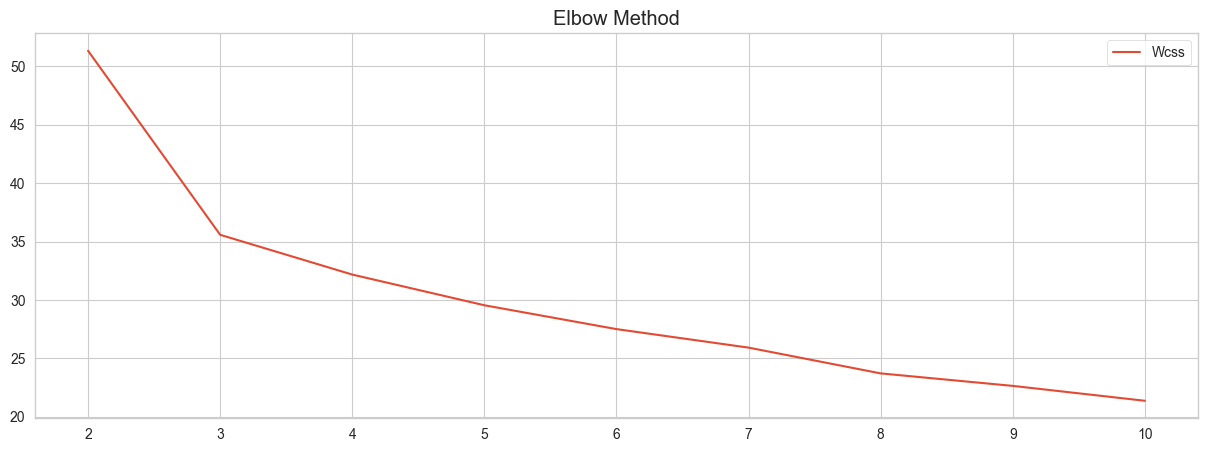

In [39]:
plt.figure( figsize = (15,5))
sns.lineplot( x = range(2,11), y = wcss , label = "Wcss")
plt.title("Elbow Method")
plt.show()

In [20]:
score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    sc = silhouette_score(df, kmeans.labels_)
    score.append(sc)

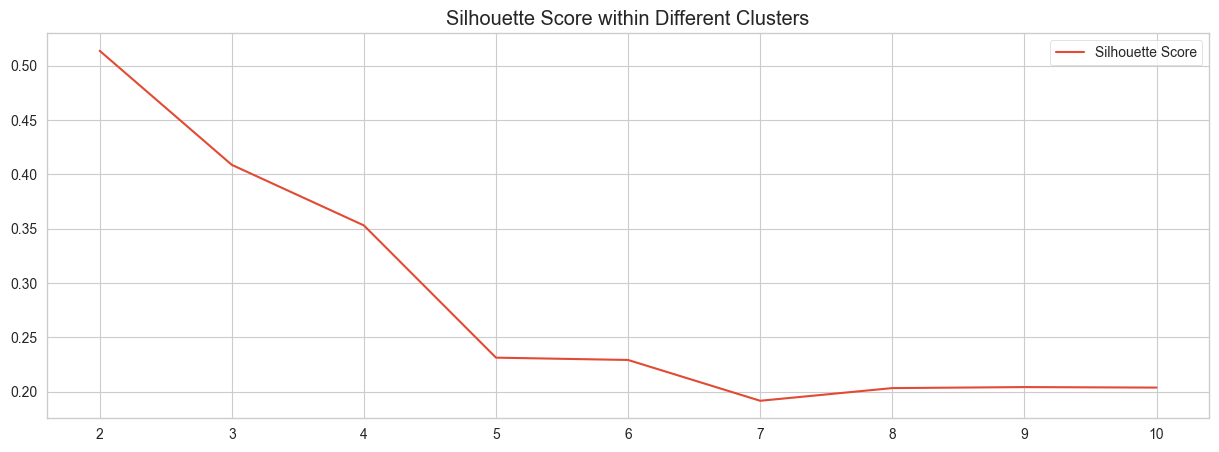

In [43]:
plt.figure( figsize = (15,5))

sns.lineplot(x = range(2,11), y = score , label = "Silhouette Score")
plt.title( "Silhouette Score within Different Clusters")
plt.show()

In [47]:
data['cluster'] = kmeans.predict(df)

In [48]:
data.head()

,Explicit,Liveness,Valence,Acousticness,Speechiness,Loudness,Duration (ms),cluster
0,1,0.1410,0.214,0.0107,0.0776,-7.001,274192,9
1,1,0.0582,0.889,0.0292,0.0683,-2.760,227239,6
2,1,0.1190,0.886,0.3590,0.2040,-5.241,140733,6
3,0,0.2320,0.554,0.0375,0.0309,-4.617,149668,4
4,0,0.3110,0.844,0.0229,0.3010,-6.294,144846,4


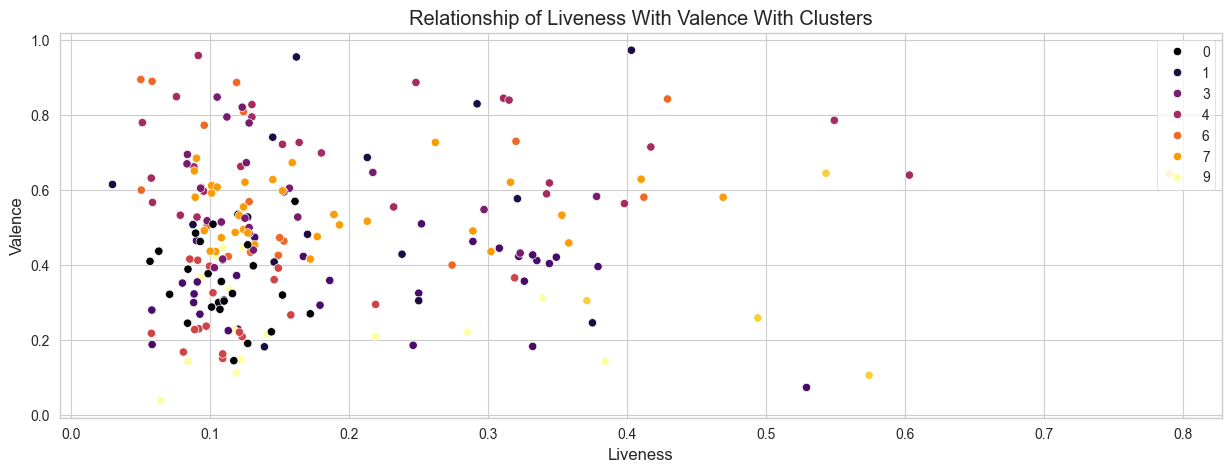

In [61]:
plt.figure( figsize = (15,5))
sns.scatterplot(data, x = 'Liveness' , y = "Valence" , hue = "cluster", palette = "inferno")
plt.title('Relationship of Liveness With Valence With Clusters')
plt.legend(loc = "upper right")
plt.show()